In [1]:
import pandas as pd

from src.settings import KEPLER_KE_DIR

path_triplets = KEPLER_KE_DIR.joinpath('triplets.csv')
path_definitions = KEPLER_KE_DIR.joinpath('plwn_senses_comments.csv')

df_triplets = pd.read_csv(path_triplets, sep='\t', dtype={'parent_id': int, 'child_id': int})
df_sense_definitions = pd.read_csv(str(path_definitions), sep='\t', dtype={'plwn_id': int})

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [9]:
import networkx as nx

# build graph to get negative samples
NUM = 10

plwn_graph = nx.DiGraph()
edge_attr = [{'reltype': reltype} for reltype in df_triplets['reltype'].values.tolist()]
plwn_graph.add_edges_from(
    list(
        zip(
            df_triplets['parent_id'].values.tolist()[0:NUM],
            df_triplets['child_id'].values.tolist()[0:NUM],
            edge_attr[0:NUM],
        )
    )
)

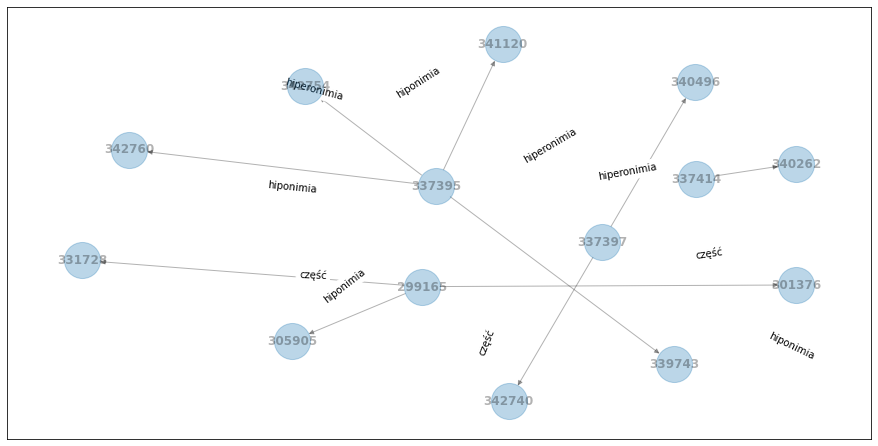

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
pos = nx.spring_layout(plwn_graph)

# Make the graph
nx.draw(plwn_graph, with_labels=True, node_size=1300, alpha=0.3, font_weight="bold", arrows=True)
labels = nx.get_edge_attributes(plwn_graph, 'reltype')
nx.draw_networkx_edge_labels(plwn_graph, pos, edge_labels=labels)

plt.axis('on')
plt.show()

In [17]:
list(plwn_graph.neighbors(337397))

[342740, 340496]

In [20]:
for neighbor in plwn_graph.neighbors(337397):
    print(plwn_graph.edges[(337397, neighbor)]["reltype"])

hiperonimia
hiponimia
